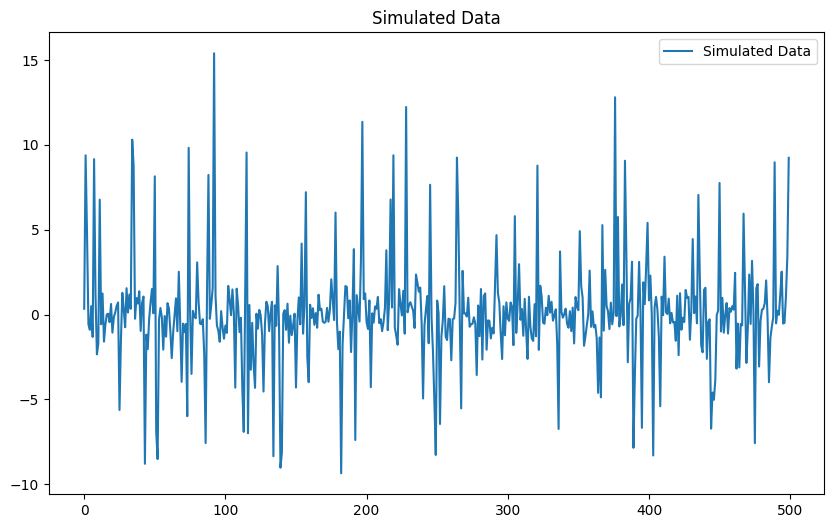

                        Markov Switching Model Results                        
Dep. Variable:                      y   No. Observations:                  500
Model:               MarkovRegression   Log Likelihood               -1114.056
Date:                Wed, 22 Jan 2025   AIC                           2240.113
Time:                        15:44:55   BIC                           2265.400
Sample:                             0   HQIC                          2250.036
                                - 500                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0360      0.060     -0.596      0.551      -0.154       0.082
sigma2         0.8396      0.106      7.893      0.0

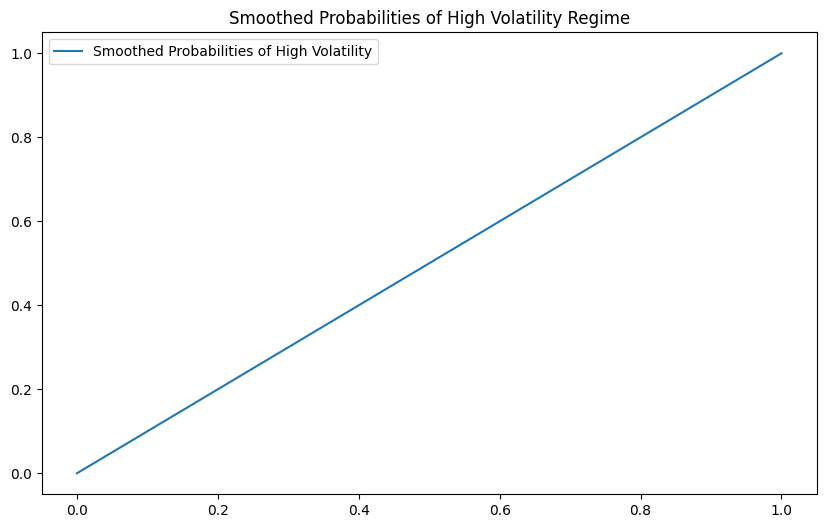

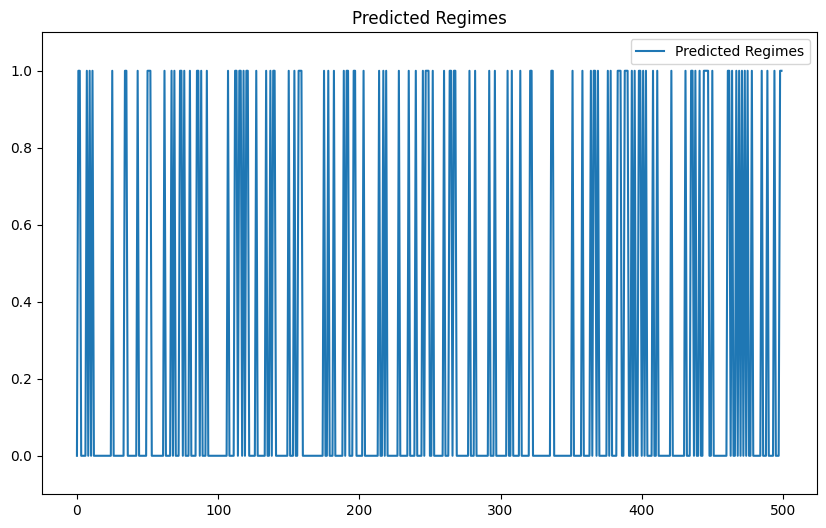

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

np.random.seed(42)
n = 500
regimes = np.random.choice([0, 1], size=n, p=[0.7, 0.3])
data = np.array(np.random.normal(0, np.where(regimes == 0, 1, 5)))


plt.figure(figsize=(10, 6))
plt.plot(data, label="Simulated Data")
plt.legend()
plt.title("Simulated Data")
plt.show()

# Fit a Markov switching model
model = MarkovRegression(data, k_regimes=2, trend='c', switching_variance=True)
result = model.fit()
print(result.summary())

print("\nTransition Matrix:")
print(result.regime_transition)


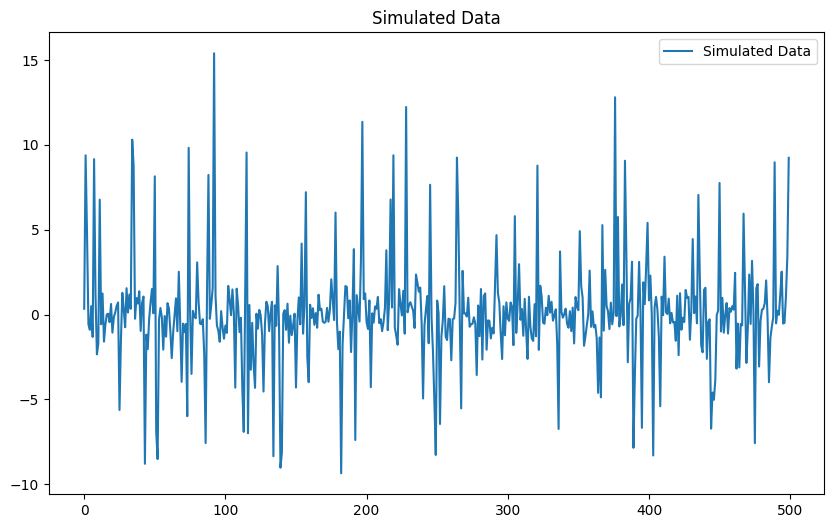

                        Markov Switching Model Results                        
Dep. Variable:                      y   No. Observations:                  500
Model:               MarkovRegression   Log Likelihood               -1114.056
Date:                Wed, 22 Jan 2025   AIC                           2240.113
Time:                        15:48:16   BIC                           2265.400
Sample:                             0   HQIC                          2250.036
                                - 500                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0360      0.060     -0.596      0.551      -0.154       0.082
sigma2         0.8396      0.106      7.893      0.0

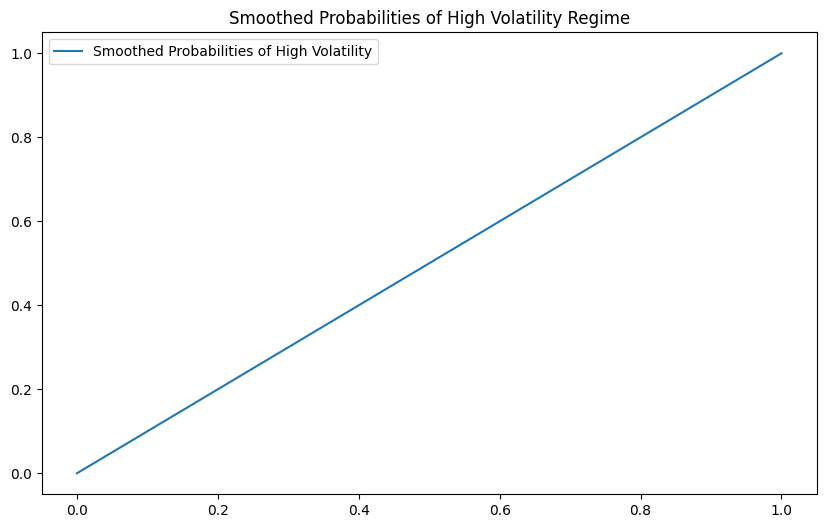

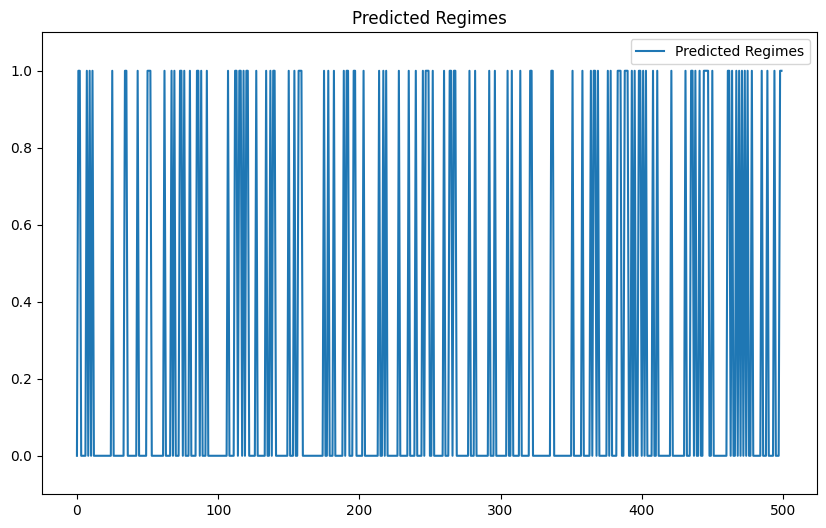

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

np.random.seed(42)
n = 500
regimes = np.random.choice([0, 1], size=n, p=[0.7, 0.3])
data = np.array(np.random.normal(0, np.where(regimes == 0, 1, 5)))


plt.figure(figsize=(10, 6))
plt.plot(data, label="Simulated Data")
plt.legend()
plt.title("Simulated Data")
plt.show()

# Fit a Markov switching model
model = MarkovRegression(data, k_regimes=2, trend='c', switching_variance=True)
result = model.fit()
print(result.summary())

print("\nTransition Matrix:")
print(result.regime_transition)

# Plot smoothed probabilities
smoothed_probs = result.smoothed_marginal_probabilities[1]
plt.figure(figsize=(10, 6))
plt.plot(smoothed_probs, label="Smoothed Probabilities of High Volatility")
plt.legend()
plt.title("Smoothed Probabilities of High Volatility Regime")
plt.show()


predicted_regimes = np.argmax(result.smoothed_marginal_probabilities, axis=1)
plt.figure(figsize=(10, 6))
plt.plot(predicted_regimes, label="Predicted Regimes")
plt.legend()
plt.title("Predicted Regimes")
plt.ylim(-0.1, 1.1)  # Set y-axis limits to better show the binary regime
plt.show()


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
import seaborn as sns
from scipy import stats

# 1. Generate and prepare data
np.random.seed(42)
n = 500
regimes = np.random.choice([0, 1], size=n, p=[0.7, 0.3])
data = np.array(np.random.normal(0, np.where(regimes == 0, 1, 5)))

# 2. Create a DataFrame with all the information
df = pd.DataFrame({
    'Data': data,
    'True_Regime': regimes,
    'Time': range(n)
})

# 3. Fit the model
model = MarkovRegression(data, k_regimes=2, trend='c', switching_variance=True)
result = model.fit()

# 4. Add predicted probabilities and regimes to DataFrame
df['Predicted_Prob_High'] = result.smoothed_marginal_probabilities[:, 1]
df['Predicted_Regime'] = np.argmax(result.smoothed_marginal_probabilities, axis=1)

# Plot 1: Original Data with Regime Highlighting
plt.figure(figsize=(12, 6))
for regime in [0, 1]:
    mask = df['True_Regime'] == regime
    plt.scatter(df[mask]['Time'], df[mask]['Data'],
                label=f"Regime {regime}", alpha=0.6)
plt.title("Original Data with True Regimes")
plt.legend()
plt.savefig('original_data_regimes.png')
plt.close()

# Plot 2: Predicted vs True Regimes
plt.figure(figsize=(12, 6))
plt.plot(df['True_Regime'], label='True Regime', alpha=0.6)
plt.plot(df['Predicted_Regime'], label='Predicted Regime', alpha=0.6)
plt.title("True vs Predicted Regimes")
plt.legend()
plt.savefig('true_vs_predicted_regimes.png')
plt.close()

# Plot 3: Density Plot for Each Regime
plt.figure(figsize=(12, 6))
for regime in [0, 1]:
    sns.kdeplot(data=df[df['True_Regime'] == regime]['Data'],
                label=f"Regime {regime}")
plt.title("Density Distribution by Regime")
plt.legend()
plt.savefig('density_distribution.png')
plt.close()

# Plot 4: Transition Probability Matrix Heatmap
plt.figure(figsize=(8, 6))
transition_matrix = result.regime_transition.reshape(2, 2)
sns.heatmap(transition_matrix, annot=True, cmap='coolwarm')
plt.title("Transition Probability Matrix")
plt.xlabel("To Regime")
plt.ylabel("From Regime")
plt.savefig('transition_matrix.png')
plt.close()

# Plot 5: Model Performance Metrics
plt.figure(figsize=(8, 6))
confusion_matrix = pd.crosstab(df['True_Regime'], df['Predicted_Regime'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: True vs Predicted Regimes")
plt.xlabel("Predicted Regime")
plt.ylabel("True Regime")
plt.savefig('confusion_matrix.png')
plt.close()

# Print Statistics
print("\nModel Performance Metrics:")
accuracy = (df['True_Regime'] == df['Predicted_Regime']).mean()
print(f"Prediction Accuracy: {accuracy:.2%}")

print("\nRegime Statistics:")
for regime in [0, 1]:
    regime_data = df[df['True_Regime'] == regime]['Data']
    print(f"\nRegime {regime}:")
    print(f"Mean: {regime_data.mean():.2f}")
    print(f"Std: {regime_data.std():.2f}")
    print(f"Skewness: {stats.skew(regime_data):.2f}")
    print(f"Kurtosis: {stats.kurtosis(regime_data):.2f}")

print("\nAverage Duration in Each Regime:")
for regime in [0, 1]:
    regime_runs = (df['Predicted_Regime'] == regime).astype(int).groupby(
        (df['Predicted_Regime'] != df['Predicted_Regime'].shift()).cumsum()
    ).sum()
    print(f"Regime {regime}: {regime_runs.mean():.2f} periods")

# Calculate and print transition statistics
transitions = pd.DataFrame({
    'From': df['Predicted_Regime'][:-1],
    'To': df['Predicted_Regime'][1:]
})
print("\nTransition Counts:")
print(pd.crosstab(transitions['From'], transitions['To']))



Model Performance Metrics:
Prediction Accuracy: 89.20%

Regime Statistics:

Regime 0:
Mean: -0.02
Std: 0.97
Skewness: 0.02
Kurtosis: -0.07

Regime 1:
Mean: 0.33
Std: 5.39
Skewness: 0.35
Kurtosis: -0.50

Average Duration in Each Regime:
Regime 0: 2.04 periods
Regime 1: 0.67 periods

Transition Counts:
To    0.0  1.0
From          
0.0   375    0
1.0     0  123


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# [Your existing data preparation and model fitting code]

# Set up the subplot layout
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])  # Original data
ax2 = fig.add_subplot(gs[0, 1])  # Predicted vs True Regimes
ax3 = fig.add_subplot(gs[1, 0])  # Confusion Matrix
ax4 = fig.add_subplot(gs[1, 1])  # Density Plot

plt.close()

confusion_matrix = np.zeros((2, 2))

def animate(i):
    global confusion_matrix

    # Clear all axes except confusion matrix
    for ax in [ax1, ax2, ax4]:
        ax.clear()

    # Plot 1: Original Data with Regime Highlighting and True Line
    current_data = df.iloc[:i+1]
    for regime in [0, 1]:
        mask = current_data['True_Regime'] == regime
        ax1.scatter(current_data[mask]['Time'], current_data[mask]['Data'],
                   label=f"Regime {regime}", alpha=0.6, s=20)
    # Add the true line
    ax1.plot(current_data['Time'], current_data['Data'], 'k-', alpha=0.3, label='Data Line')
    ax1.set_title("Original Data with True Regimes")
    ax1.set_ylim(df['Data'].min() - 1, df['Data'].max() + 1)


    # Get true regimes and predicted probabilities
    true_regimes = df['True_Regime'][:i+1]
    pred_probs = df['Predicted_Prob_High'][:i+1]
    pred_regimes = (pred_probs > 0.5).astype(int)

    # Plot 2: Predicted vs True Regimes (Enhanced visibility)
    ax2.fill_between(range(len(true_regimes)), true_regimes, alpha=0.3, label='True Regime')
    ax2.fill_between(range(len(pred_regimes)), pred_regimes, alpha=0.3, label='Predicted Regime')
    ax2.set_title("True vs Predicted Regimes")
    ax2.set_ylim(-0.1, 1.1)

    ax2.grid(True)

    # Plot 3: Confusion Matrix (Using your working version)
    ax3.clear()
    confusion_matrix = pd.crosstab(true_regimes, pred_regimes).values
    if confusion_matrix.shape != (2, 2):
        temp_matrix = np.zeros((2, 2))
        for t in range(2):
            for p in range(2):
                if t < confusion_matrix.shape[0] and p < confusion_matrix.shape[1]:
                    temp_matrix[t, p] = confusion_matrix[t, p]
        confusion_matrix = temp_matrix

    im = ax3.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
    for (j,i),label in np.ndenumerate(confusion_matrix):
        ax3.text(i, j, int(label), ha='center', va='center',
                color='white' if label > 50 else 'black')
    ax3.set_xticks([0, 1])
    ax3.set_yticks([0, 1])
    ax3.set_xticklabels(['Predicted 0', 'Predicted 1'])
    ax3.set_yticklabels(['True 0', 'True 1'])
    ax3.set_title("Confusion Matrix")

    # Plot 4: Density Plot
    for regime in [0, 1]:
        regime_data = current_data[current_data['True_Regime'] == regime]['Data']
        if len(regime_data) > 1:
            sns.kdeplot(data=regime_data, ax=ax4, label=f"Regime {regime}")
    ax4.set_title("Density Distribution by Regime")
    ax4.legend()

    plt.suptitle(f"Observation: {i+1}/{len(df)}", y=1.02)
    plt.tight_layout()
    return []

# Create animation
step = 5  # Update every 5 frames
frames = range(10, len(df), step)  # Start from 10 to ensure enough data
anim = FuncAnimation(fig, animate, frames=frames, interval=100, blit=False)

# Save as GIF
writer = PillowWriter(fps=10)
anim.save('regime_switching_animation.gif', writer=writer)


<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# [Your existing data preparation code remains the same]

# Set up the subplot layout
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, 0])  # Original data
ax2 = fig.add_subplot(gs[0, 1])  # Predicted vs True Regimes
ax3 = fig.add_subplot(gs[0, 2])  # Density Plot
ax4 = fig.add_subplot(gs[1, 0])  # Confusion Matrix
ax5 = fig.add_subplot(gs[1, 1])  # Transition Matrix

plt.close()

def get_regime_predictions(data):
    """Helper function to get regime predictions safely"""
    try:
        model = MarkovRegression(data, k_regimes=2, trend='c', switching_variance=True)
        result = model.fit(disp=False)
        probs = result.smoothed_marginal_probabilities
        if probs is not None and probs.shape[1] >= 2:
            pred_regimes = (probs[:, 1] > 0.5).astype(int)
            return pred_regimes, result
        else:
            return np.zeros(len(data)), None
    except:
        return np.zeros(len(data)), None

def animate(frame):
    # Clear all axes
    for ax in [ax1, ax2, ax3, ax4, ax5]:
        ax.clear()

    # Get current slice of data
    current_df = df.iloc[:frame]

    # Plot 1: Original Data with Regime Highlighting
    for regime in [0, 1]:
        regime_data = current_df[current_df['True_Regime'] == regime]
        ax1.scatter(regime_data['Time'], regime_data['Data'],
                   label=f"Regime {regime}", alpha=0.6, s=20)
    ax1.set_title("Original Data with True Regimes")
    ax1.set_ylim(df['Data'].min() - 1, df['Data'].max() + 1)
    ax1.legend()

    if len(current_df) > 20:  # Only try to fit model if we have enough data
        # Get predictions
        pred_regimes, result = get_regime_predictions(current_df['Data'])

        # Plot 2: Predicted vs True Regimes
        ax2.plot(current_df.index, current_df['True_Regime'],
                label='True Regime', alpha=0.6)
        ax2.plot(current_df.index, pred_regimes,
                label='Predicted Regime', alpha=0.6)
        ax2.set_title("True vs Predicted Regimes")
        ax2.set_ylim(-0.1, 1.1)
        ax2.legend()

        # Plot 3: Density Plot
        for regime in [0, 1]:
            regime_data = current_df[current_df['True_Regime'] == regime]['Data']
            if len(regime_data) > 1:
                sns.kdeplot(data=regime_data, ax=ax3, label=f"Regime {regime}")
        ax3.set_title("Density Distribution by Regime")
        ax3.legend()

        # Plot 4: Confusion Matrix
        confusion_matrix = pd.crosstab(
            current_df['True_Regime'],
            pd.Series(pred_regimes, index=current_df.index)
        ).fillna(0).values

        # Ensure 2x2 matrix
        if confusion_matrix.shape != (2, 2):
            temp_matrix = np.zeros((2, 2))
            for t in range(min(2, confusion_matrix.shape[0])):
                for p in range(min(2, confusion_matrix.shape[1])):
                    temp_matrix[t, p] = confusion_matrix[t, p]
            confusion_matrix = temp_matrix

        im = ax4.imshow(confusion_matrix, cmap='Blues', interpolation='nearest')
        for (j,i),label in np.ndenumerate(confusion_matrix):
            ax4.text(i, j, int(label), ha='center', va='center',
                     color='white' if label > 50 else 'black')
        ax4.set_xticks([0, 1])
        ax4.set_yticks([0, 1])
        ax4.set_xticklabels(['Predicted 0', 'Predicted 1'])
        ax4.set_yticklabels(['True 0', 'True 1'])
        ax4.set_title("Confusion Matrix")

        # Plot 5: Transition Matrix
        if result is not None:
            transition_matrix = result.regime_transition.reshape(2, 2)
            im2 = ax5.imshow(transition_matrix, cmap='coolwarm', interpolation='nearest')
            for (j,i),label in np.ndenumerate(transition_matrix):
                ax5.text(i, j, f'{label:.2f}', ha='center', va='center')
            ax5.set_title("Transition Probability Matrix")
            ax5.set_xticks([0, 1])
            ax5.set_yticks([0, 1])
            ax5.set_xlabel("To Regime")
            ax5.set_ylabel("From Regime")

    plt.suptitle(f"Frame {frame}/{len(df)}", y=1.02)
    plt.tight_layout()
    return []

# Create animation
step = 10  # Update every 10 frames
frames = range(20, len(df), step)  # Start from 20 to ensure enough data
anim = FuncAnimation(fig, animate, frames=frames, interval=200, blit=False)

# Save as GIF
writer = PillowWriter(fps=5)
anim.save('regime_switching_animation.gif', writer=writer)


<Figure size 640x480 with 0 Axes>